# Name: Gayathri Narayanan

# Prediction Using Unsupervised ML (Beginner)

# From the given dataset, predict the optimum number of clusters and represent it visually

In [5]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#lets check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Let's remove  the unnecessary column such as id column

In [9]:
x = df.iloc[:, 1:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding optimum number of clusters

In [10]:
cluster_num = list(range(1, 10))
inertia = []
for c in cluster_num:
    model = KMeans(n_clusters = c, init = 'k-means++', n_init = 15, max_iter = 100)
    model.fit(x)
    inertia.append(model.inertia_)

Text(0, 0.5, 'within-Cluster Sum of Squares')

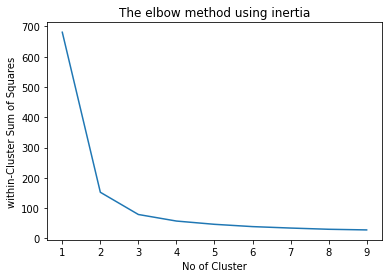

In [11]:
plt.plot(cluster_num, inertia)
plt.title('The elbow method using inertia')
plt.xlabel('No of Cluster')
plt.ylabel('within-Cluster Sum of Squares')

In [12]:
model = KMeans(n_clusters = 3, init = 'k-means++', n_init = 20, max_iter = 200).fit(x)

In [13]:
x['cluster'] = model.labels_
x['cluster'].value_counts(sort = False)

0    50
1    62
2    38
Name: cluster, dtype: int64

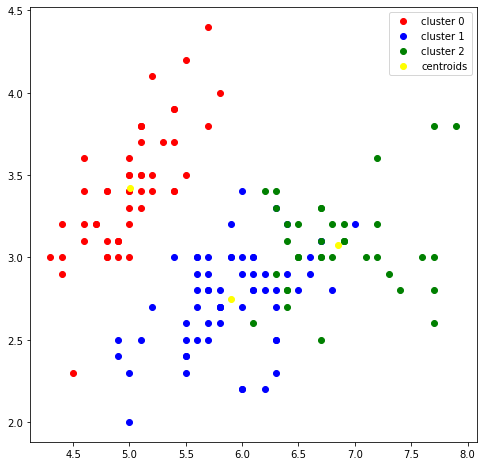

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
color = ['red', 'blue', 'green']
label = list(range(len(np.unique(x['cluster']))))
for i in range(len(np.unique(x['cluster']))):
    plt.scatter(x.loc[x['cluster'] == i, 'SepalLengthCm'], 
                x.loc[x['cluster'] == i, 'SepalWidthCm'], 
               color = color[i], 
            label = 'cluster {}'.format(i))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'yellow', label = 'centroids')
plt.legend()

Thus, we find 3 optimum clusters